<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [18]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

In [46]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
# from js import fetch
# import io

# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp = await fetch(URL)
# dataset_part_2.csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


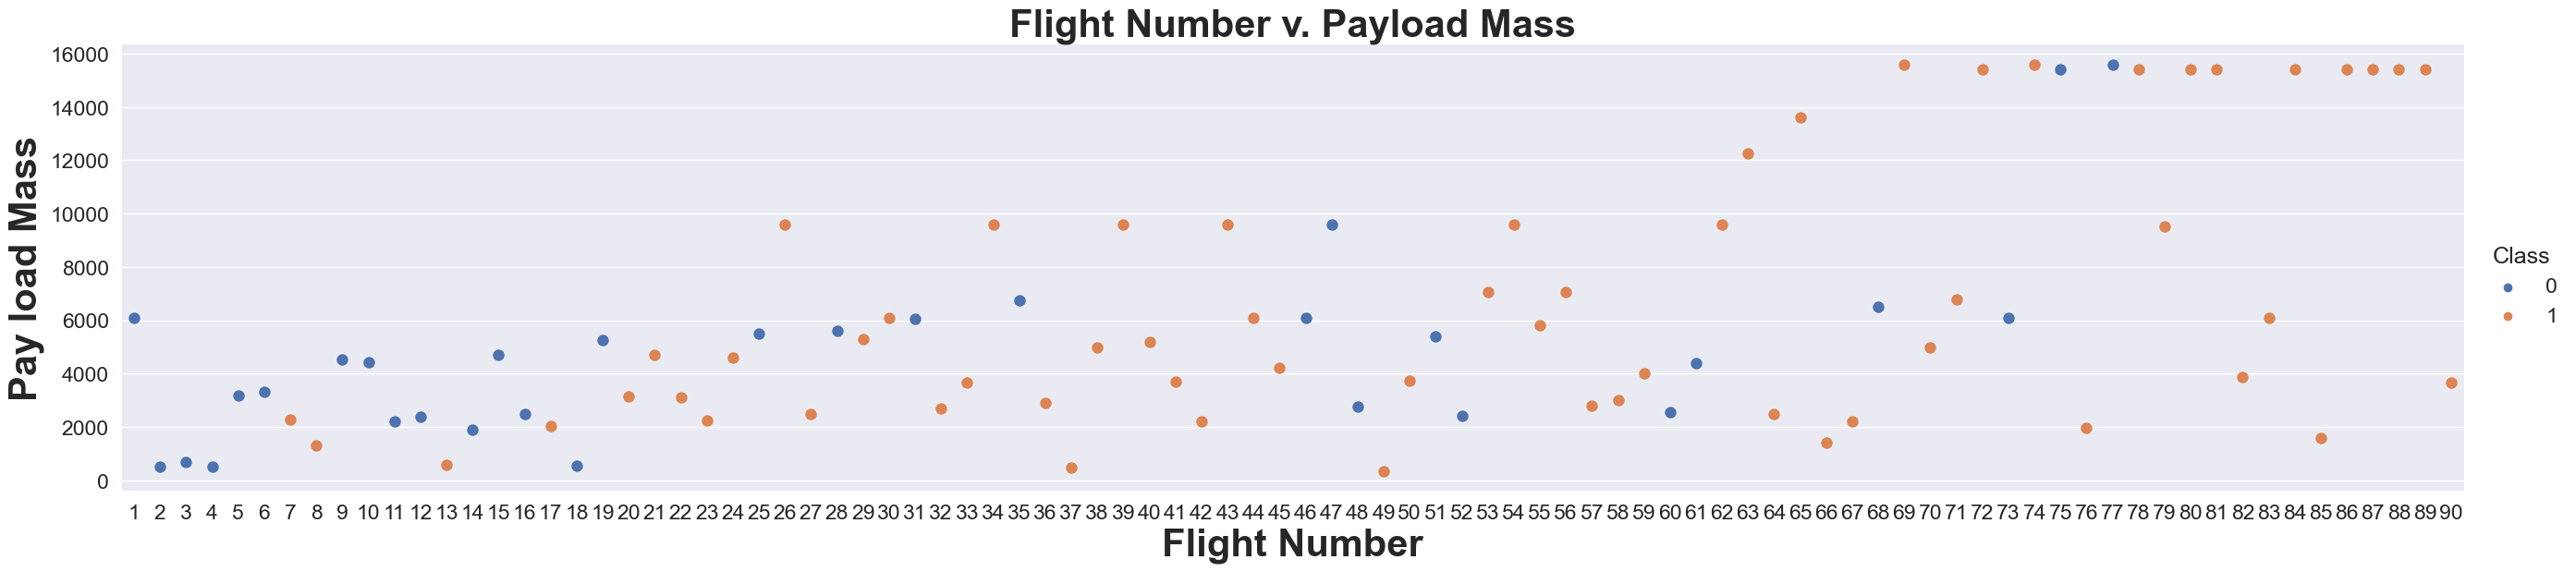

In [99]:
sns.set(font_scale=1.5)

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", 
            data=df, height=6, s=80, aspect = 4.5)

plt.title('Flight Number v. Payload Mass', fontsize=30, fontweight='bold')
plt.xlabel("Flight Number",fontsize=30, fontweight='bold')
plt.ylabel("Pay load Mass",fontsize=30, fontweight='bold')

plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


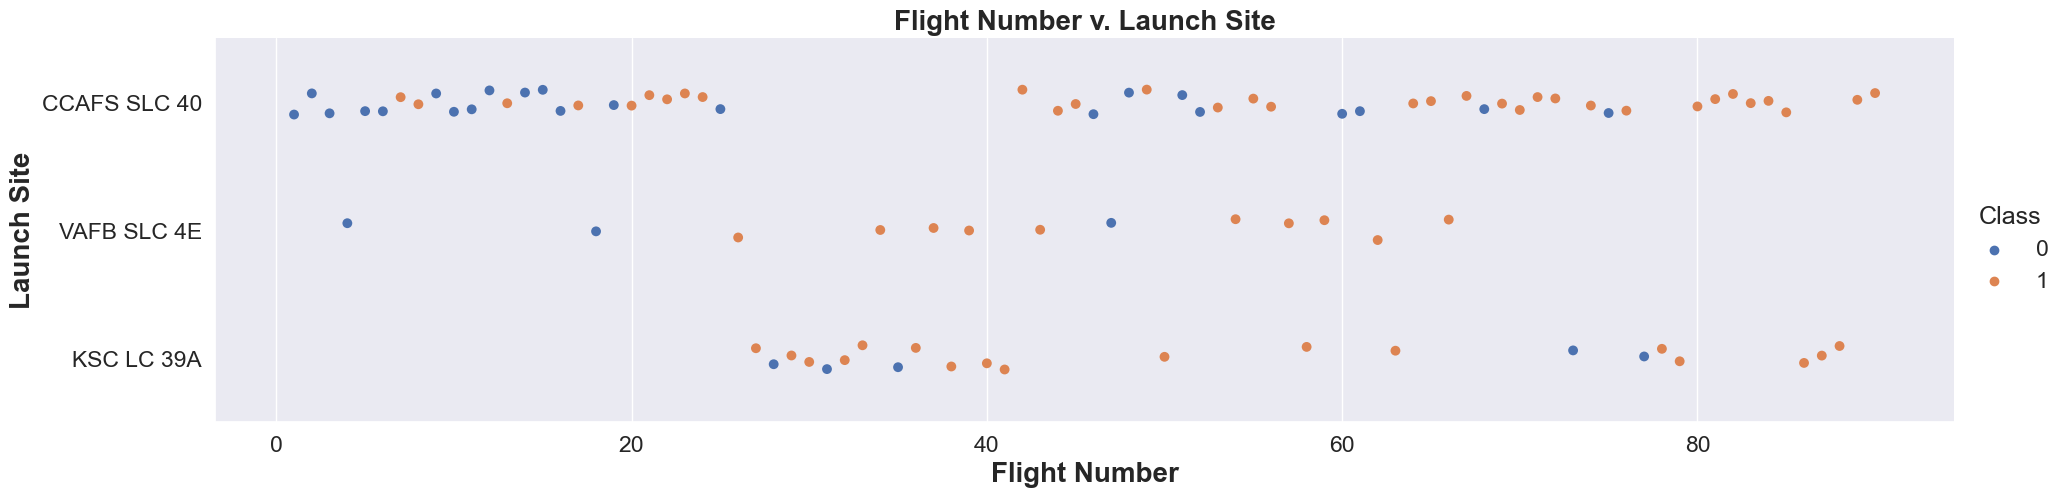

In [86]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.set(font_scale=1.5)

sns.catplot(x='FlightNumber', y='LaunchSite', data=df, 
            hue='Class', s=50, aspect=4)

plt.title('Flight Number v. Launch Site', fontsize=20, fontweight='bold')
plt.xlabel('Flight Number', fontsize=20, fontweight='bold')
plt.ylabel('Launch Site', fontsize=20, fontweight='bold')

plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


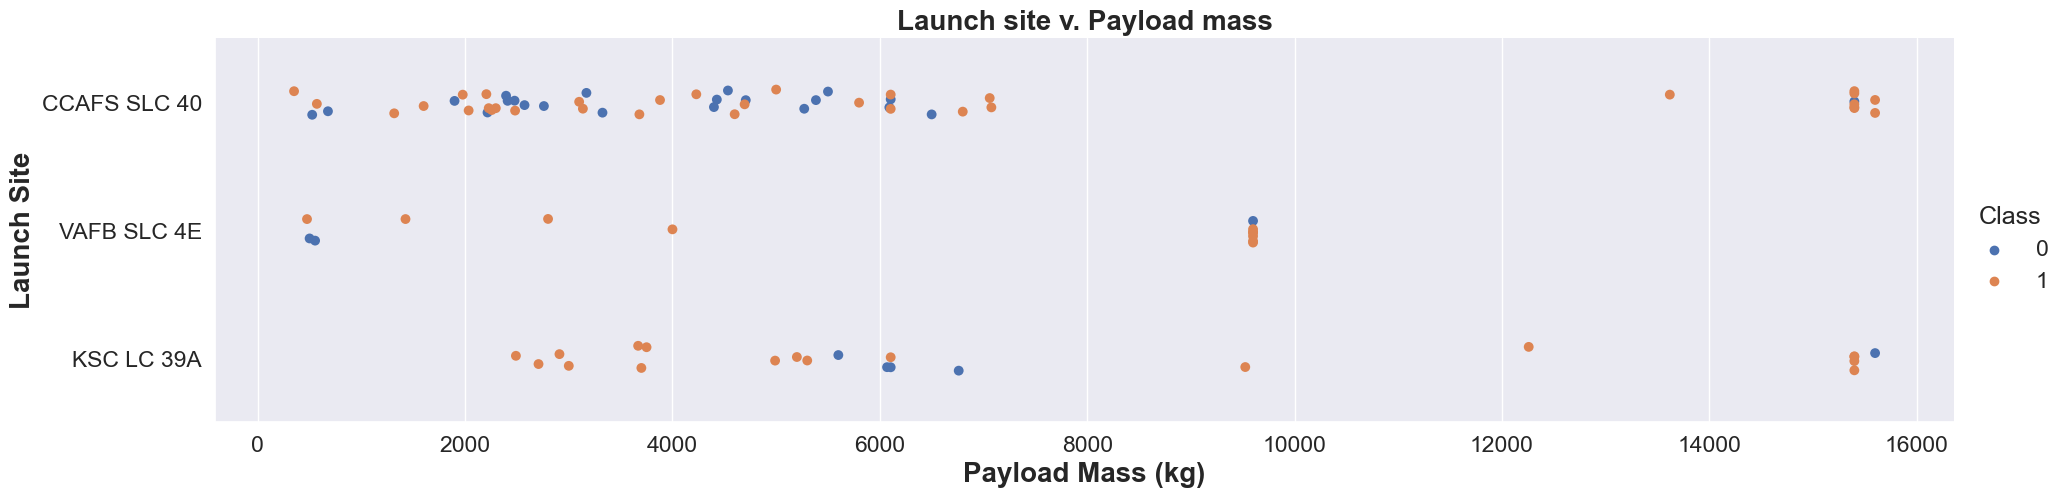

In [100]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.set(font_scale=1.5)
sns.catplot(x='PayloadMass', y='LaunchSite', data=df, hue='Class', s=50, aspect=4)
plt.title("Launch site v. Payload mass",fontsize=20, fontweight='bold')
plt.xlabel("Payload Mass (kg)",fontsize=20, fontweight='bold')
plt.ylabel("Launch Site",fontsize=20, fontweight='bold')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


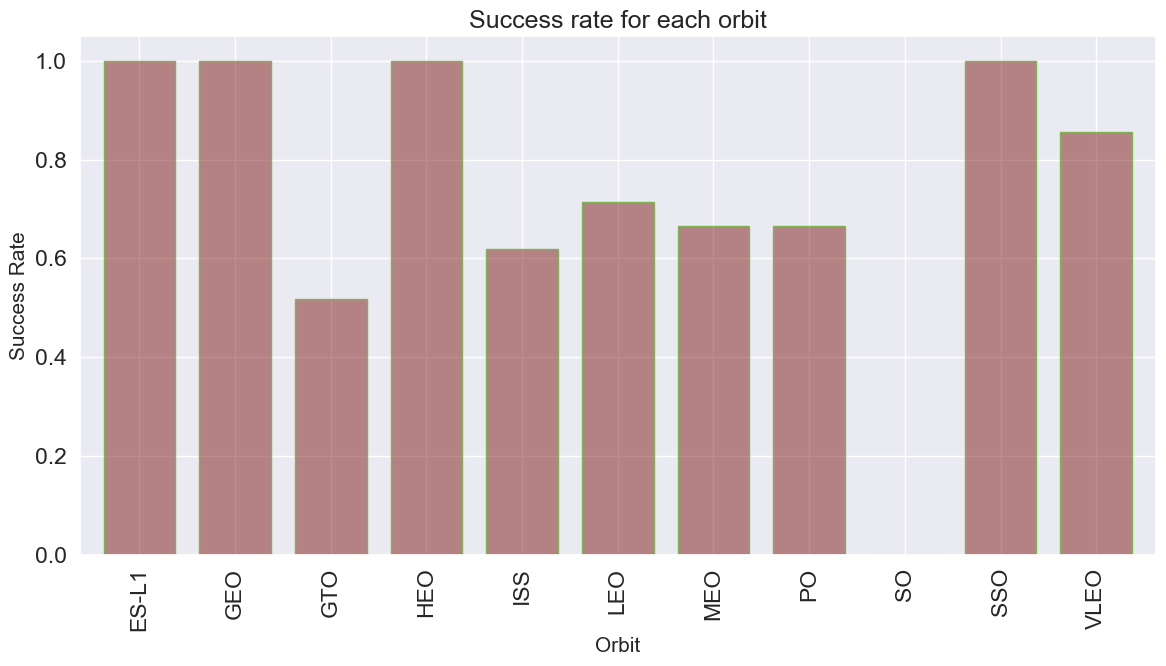

In [160]:
# HINT use groupby method on Orbit column and get the mean of Class column
df.groupby(['Orbit'])['Class'].mean().plot(kind='bar', 
                                                title="Success rate for each orbit", 
                                                width=0.75,
                                                figsize=(12, 7), 
                                                color=(0.5, 0.1, 0.1, 0.5), 
                                                edgecolor = '#7eb54e')
plt.xlabel("Orbit",fontsize=15)
plt.ylabel("Success Rate",fontsize=15)
plt.tight_layout()

plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type

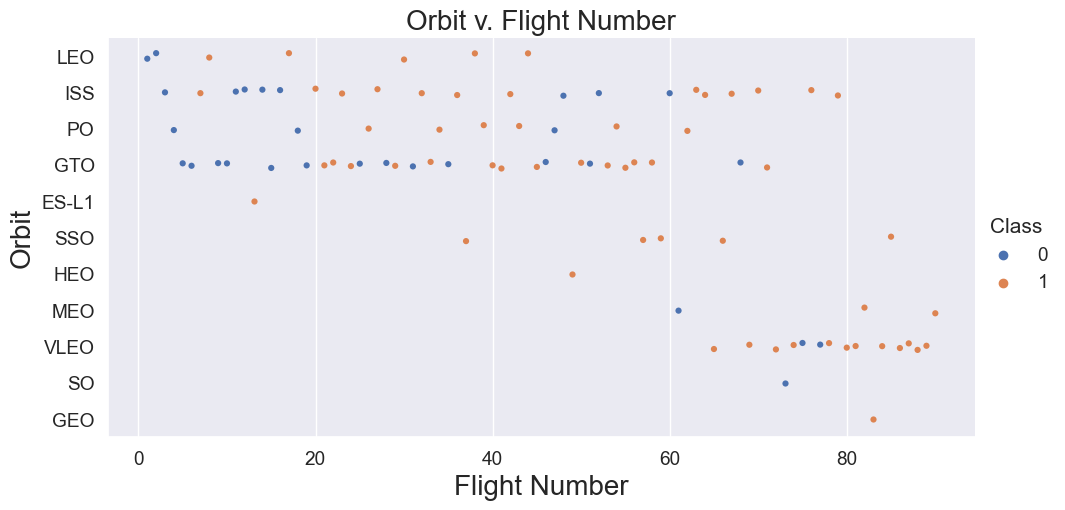

In [101]:
sns.set(font_scale = 1.25)

sns.catplot(y="Orbit", x="FlightNumber", 
            hue="Class", data=df, s=20, aspect=2)

plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.title("Orbit v. Flight Number",fontsize=20)

plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


Text(58.41374999999999, 0.5, 'Orbit')

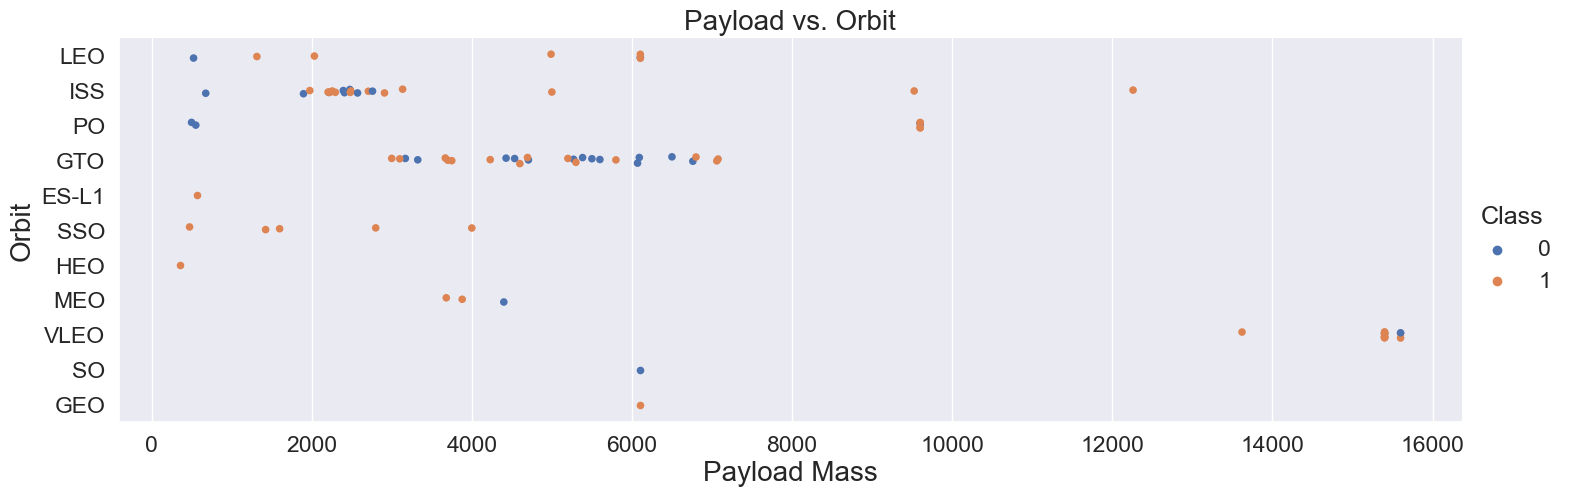

In [112]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.set(font_scale=1.5)

sns.catplot(x='PayloadMass', y='Orbit', data=df,
           hue='Class', s=30, aspect=3)

plt.title('Payload vs. Orbit', fontsize=20)
plt.xlabel('Payload Mass', fontsize=20)
plt.ylabel('Orbit', fontsize=20)

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [149]:
# A function to Extract years from the date 
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split('-')[0])
    return year
Extract_year()
df['Date'] = year
# df.head()

In [159]:
df.groupby(['Date'])['Class'].mean()

Date
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

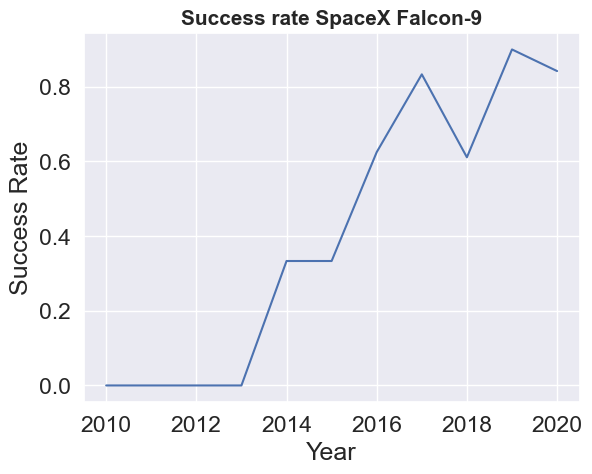

In [167]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Date'] = df['Date'].astype(int)
rate = df.groupby(['Date'])['Class'].mean()

sns.lineplot(x=df['Date'].unique(), y=rate)

plt.title('Success rate SpaceX Falcon-9', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Success Rate')

plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [194]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 
               'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
11,12,2395.0,ISS,CCAFS SLC 40,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012
13,14,1898.0,ISS,CCAFS SLC 40,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015
15,16,2477.0,ISS,CCAFS SLC 40,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018
16,17,2034.0,LEO,CCAFS SLC 40,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019
17,18,553.0,PO,VAFB SLC 4E,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [197]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial']).astype(int)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
11,12,2395,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,14,1898,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,2477,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,17,2034,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,18,553,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400,2,1,1,1,5,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400,3,1,1,1,5,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400,6,1,1,1,5,5,0,0,...,0,0,0,0,1,0,0,0,0,0
88,89,15400,3,1,1,1,5,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [202]:
# HINT: use astype function
features_one_hot.astype('float64').dtypes

FlightNumber                           float64
PayloadMass                            float64
Flights                                float64
GridFins                               float64
Reused                                 float64
Legs                                   float64
Block                                  float64
ReusedCount                            float64
Orbit_GEO                              float64
Orbit_GTO                              float64
Orbit_HEO                              float64
Orbit_ISS                              float64
Orbit_LEO                              float64
Orbit_MEO                              float64
Orbit_PO                               float64
Orbit_SSO                              float64
Orbit_VLEO                             float64
LaunchSite_CCAFS SLC 40                float64
LaunchSite_KSC LC 39A                  float64
LaunchSite_VAFB SLC 4E                 float64
LandingPad_5e9e3032383ecb267a34e7c7    float64
LandingPad_5e

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [204]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
